In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import ast
from dlvc.evaluation import plot_evaluation
plt.style.use('ggplot')

In [2]:
# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
results = pd.read_csv('results.csv')

models_cnn=("SCNN" "DCNN" "DNCNN" "SCNN_opt" "DCNN_opt" "DNCNN_opt")

models_vit=("VTS" "VTD" "VTDR" "VTS_opt" "VTD_opt" "VTDR_opt")

models_res=("RN18" "RN18opt")

first: SimpleCNN, DeepCNN, DeepNormalizedCNN, VisionTransformerShallow,VisionTransformerDeep, VisionTransformerDeepResidual, ResNet18Dropout

In [4]:
first = ['SimpleCNN', 'DeepCNN', 'DeepNormalizedCNN', 'VisionTransformerShallow', 'VisionTransformerDeep', 'VisionTransformerDeepResidual', 'ResNet18opt']
# select only SimpleCNN, DeepCNN, DeepNormalizedCNN, VisionTransformerShallow,VisionTransformerDeep, VisionTransformerDeepResidual, ResNet18Dropout
df_first = results[results['model'].isin(first)]
# drop df_first from results
results = results.drop(df_first.index)
# split first, with _opt and without
df_dropout = results[results['model'].str.contains('_opt') == True]
# drop df_dropout from results
results = results.drop(df_dropout.index)
df_no_dropout = results

In [5]:
df_dropout

,model,train/loss,train/mClassAcc,train/mAcc,val/loss,val/mClassAcc,val/mAcc,test/loss,test/mClassAcc,test/mAcc
10,SCNN_opt,"(2.285207748413086, 2.26592755317688, 2.193672...","(0.11147743910551071, 0.120272655505687, 0.144...","(0.1124, 0.1212, 0.1455, 0.1642, 0.1824, 0.195...","(2.309290885925293, 2.1891000270843506, 2.1918...","(0.11042059171013534, 0.16040244163013995, 0.1...","(0.1107, 0.1593, 0.1635, 0.1992, 0.2019, 0.239...",1.922327,0.2665,0.2665
11,DCNN_opt,"(1.9324854612350464, 1.8493976593017578, 2.248...","(0.1608658220618963, 0.26806542128324506, 0.30...","(0.1612, 0.268, 0.3046, 0.3267, 0.3433, 0.3658...","(2.0171828269958496, 1.627102255821228, 1.7050...","(0.28926125876605513, 0.3656675904989243, 0.37...","(0.2879, 0.3658, 0.381, 0.3917, 0.4267, 0.4312...",1.445050,0.4809,0.4809
12,DNCNN_opt,"(1.811194896697998, 1.3468042612075806, 1.3177...","(0.27994204461574557, 0.3741248294711113, 0.41...","(0.2804, 0.3742, 0.4149, 0.4389, 0.4544, 0.478...","(1.8527495861053467, 1.24483323097229, 2.06096...","(0.3822071522474289, 0.40301636680960656, 0.30...","(0.3833, 0.4027, 0.3079, 0.4165, 0.4454, 0.5, ...",1.241260,0.5437,0.5437
16,VTS_opt,"(2.3546736240386963, 2.1943891048431396, 2.385...","(0.12640102580189705, 0.12614678591489792, 0.1...","(0.1269, 0.1263, 0.1462, 0.1402, 0.1489, 0.138...","(2.214358329772949, 2.4245994091033936, 2.1558...","(0.16415790114551781, 0.20830183802172542, 0.1...","(0.1651, 0.2074, 0.18, 0.1702, 0.1859, 0.2099,...",2.162976,0.2164,0.2164
17,VTD_opt,"(2.316525936126709, 2.300074338912964, 2.30004...","(0.10315379425883293, 0.09609117694199085, 0.0...","(0.1048, 0.0985, 0.0985, 0.1031, 0.0959, 0.100...","(2.319274663925171, 2.3005824089050293, 2.3043...","(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","(0.098, 0.0952, 0.1003, 0.0952, 0.0952, 0.098,...",2.302809,0.1000,0.1000
18,VTDR_opt,"(266.39056396484375, 154.06484985351562, 100.9...","(0.18268513530492783, 0.21101359128952027, 0.2...","(0.1828, 0.2112, 0.2399, 0.2415, 0.248, 0.2514...","(348.7923889160156, 119.76924896240234, 176.77...","(0.18896824594121425, 0.2613959848880768, 0.25...","(0.1928, 0.2614, 0.2503, 0.2489, 0.2662, 0.281...",70.549097,0.2914,0.2914
20,RN18_opt,"(1.5612049102783203, 1.7104982137680054, 1.846...","(0.2561458952724934, 0.35696287304162977, 0.39...","(0.2556, 0.3561, 0.3977, 0.4346, 0.463, 0.5041...","(1.8425772190093994, 1.7979283332824707, 1.490...","(0.2774133832659572, 0.23910247669555246, 0.38...","(0.2778, 0.2411, 0.3861, 0.4356, 0.5081, 0.372...",1.252289,0.5712,0.5712


In [6]:
df_no_dropout

,model,train/loss,train/mClassAcc,train/mAcc,val/loss,val/mClassAcc,val/mAcc,test/loss,test/mClassAcc,test/mAcc
7,SCNN,"(2.0028371810913086, 1.2860000133514404, 1.536...","(0.17541077435016633, 0.27095518782734873, 0.3...","(0.1749, 0.2715, 0.322, 0.3529, 0.3789, 0.3924...","(2.2750113010406494, 1.9787406921386719, 1.643...","(0.24998638164252043, 0.31178320944309235, 0.3...","(0.2495, 0.3109, 0.3769, 0.3887, 0.3958, 0.425...",1.514490,0.4512,0.4512
8,DCNN,"(1.9104232788085938, 1.6794285774230957, 1.941...","(0.24951109290122986, 0.35957019925117495, 0.3...","(0.2493, 0.3593, 0.3946, 0.4206, 0.4498, 0.471...","(1.8431986570358276, 1.8088313341140747, 1.521...","(0.3711405783891678, 0.38544361740350724, 0.44...","(0.3708, 0.385, 0.4505, 0.4622, 0.4633, 0.4989...",1.249064,0.5544,0.5544
9,DNCNN,"(1.3969931602478027, 1.321134328842163, 1.8082...","(0.3510568171739578, 0.4550129234790802, 0.504...","(0.351, 0.4553, 0.5049, 0.5416, 0.5674, 0.5934...","(1.4086096286773682, 1.7335660457611084, 1.049...","(0.38377803564071655, 0.3954094462096691, 0.48...","(0.3845, 0.394, 0.487, 0.5144, 0.5203, 0.5822,...",1.062845,0.6305,0.6305
13,VTS,"(2.1181819438934326, 2.208814859390259, 2.2619...","(0.15735576748847963, 0.17021648734807968, 0.1...","(0.158, 0.1714, 0.1758, 0.1568, 0.1454, 0.1541...","(2.177267551422119, 2.1989474296569824, 2.1056...","(0.1746566466987133, 0.17550271190702915, 0.17...","(0.1746, 0.175, 0.1772, 0.1676, 0.1705, 0.1707...",2.189459,0.2002,0.2002
14,VTD,"(2.3089940547943115, 2.3015942573547363, 2.311...","(0.09534702431410551, 0.10189727395772934, 0.0...","(0.0966, 0.1043, 0.0986, 0.1005, 0.1001, 0.102...","(2.290602684020996, 2.2993040084838867, 2.2924...","(0.1, 0.1, 0.1, 0.10032420074567198, 0.1, 0.1,...","(0.1003, 0.1003, 0.098, 0.1019, 0.098, 0.0952,...",2.302823,0.1000,0.1000
15,VTDR,"(283.51019287109375, 87.13569641113281, 152.39...","(0.17618694007396699, 0.22324654906988145, 0.2...","(0.1764, 0.2235, 0.2468, 0.2564, 0.2554, 0.261...","(108.85936737060547, 289.45330810546875, 88.14...","(0.23510783007368447, 0.2545979768037796, 0.29...","(0.2357, 0.2559, 0.2946, 0.308, 0.322, 0.2979,...",79.965269,0.2770,0.2770
19,RN18,"(1.4071791172027588, 1.8784832954406738, 1.413...","(0.322651369869709, 0.4110476702451706, 0.4729...","(0.322, 0.4107, 0.473, 0.503, 0.5478, 0.5651, ...","(2.4001615047454834, 1.6324520111083984, 1.197...","(0.3643176153302193, 0.4071950104087591, 0.408...","(0.3655, 0.4086, 0.407, 0.4375, 0.4946, 0.5397...",1.209954,0.6101,0.6101


In [7]:
df_first

,model,train/loss,train/mClassAcc,train/mAcc,val/loss,val/mClassAcc,val/mAcc,test/loss,test/mClassAcc,test/mAcc
0,SimpleCNN,"(2.323148727416992, 2.3031349182128906, 2.3545...","(0.10112112425267697, 0.10708210596349091, 0.1...","(0.1036, 0.1095, 0.1199, 0.1434, 0.151, 0.1627...","(2.3053886890411377, 2.312398910522461, 2.3087...","(0.09904476141091437, 0.10265319549944252, 0.1...","(0.0945, 0.0983, 0.1305, 0.1659, 0.1773, 0.188...",1.910421,0.2707,0.2707
1,DeepCNN,"(2.3521013259887695, 2.0262210369110107, 1.543...","(0.17896648347377778, 0.2901139110326767, 0.31...","(0.1795, 0.291, 0.3199, 0.3339, 0.3548, 0.36, ...","(1.741685152053833, 1.6977438926696777, 1.8379...","(0.31974007999524473, 0.34277949407696723, 0.3...","(0.3198, 0.3437, 0.3437, 0.3877, 0.4069, 0.409...",1.491082,0.4616,0.4616
2,DeepNormalizedCNN,"(1.6820104122161865, 1.476676344871521, 1.8053...","(0.26964321583509443, 0.35977372229099275, 0.3...","(0.2694, 0.3591, 0.3971, 0.4305, 0.4552, 0.468...","(1.6074765920639038, 2.0802295207977295, 1.790...","(0.3093743145465851, 0.3642546094954014, 0.397...","(0.3088, 0.365, 0.3959, 0.4177, 0.4313, 0.525,...",1.320729,0.5222,0.5222
3,VisionTransformerShallow,"(2.629920244216919, 2.370744228363037, 2.40907...","(0.13320706114172937, 0.1321685440838337, 0.13...","(0.1338, 0.1326, 0.1337, 0.1493, 0.1515, 0.165...","(2.2052104473114014, 2.5657079219818115, 2.481...","(0.16647931300103663, 0.17190217562019824, 0.2...","(0.1666, 0.1715, 0.2074, 0.2147, 0.2294, 0.206...",2.094615,0.2332,0.2332
4,VisionTransformerDeep,"(2.3038547039031982, 2.317124843597412, 2.3045...","(0.09769904483109712, 0.09914091788232327, 0.0...","(0.0986, 0.1012, 0.0962, 0.1015, 0.0943, 0.101...","(2.33280348777771, 2.3034708499908447, 2.30847...","(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","(0.0977, 0.0977, 0.1003, 0.1003, 0.098, 0.0952...",2.302991,0.1000,0.1000
5,VisionTransformerDeepResidual,"(241.9098358154297, 164.18954467773438, 103.17...","(0.17374088019132614, 0.2223655626177788, 0.22...","(0.174, 0.2228, 0.2225, 0.2339, 0.252, 0.2539,...","(499.8027038574219, 135.44236755371094, 189.69...","(0.16909658249933274, 0.2548723111860454, 0.23...","(0.1695, 0.2545, 0.2378, 0.2731, 0.3008, 0.3, ...",52.758599,0.3322,0.3322
6,ResNet18opt,"(2.289670705795288, 1.894849419593811, 1.86964...","(0.26062999218702315, 0.3624389827251434, 0.40...","(0.2602, 0.3617, 0.4093, 0.4567, 0.4818, 0.509...","(1.906722068786621, 1.8782955408096313, 1.9240...","(0.3296696126461029, 0.3544305648654699, 0.335...","(0.3305, 0.3551, 0.3357, 0.43, 0.4619, 0.4443,...",1.210327,0.5764,0.5764


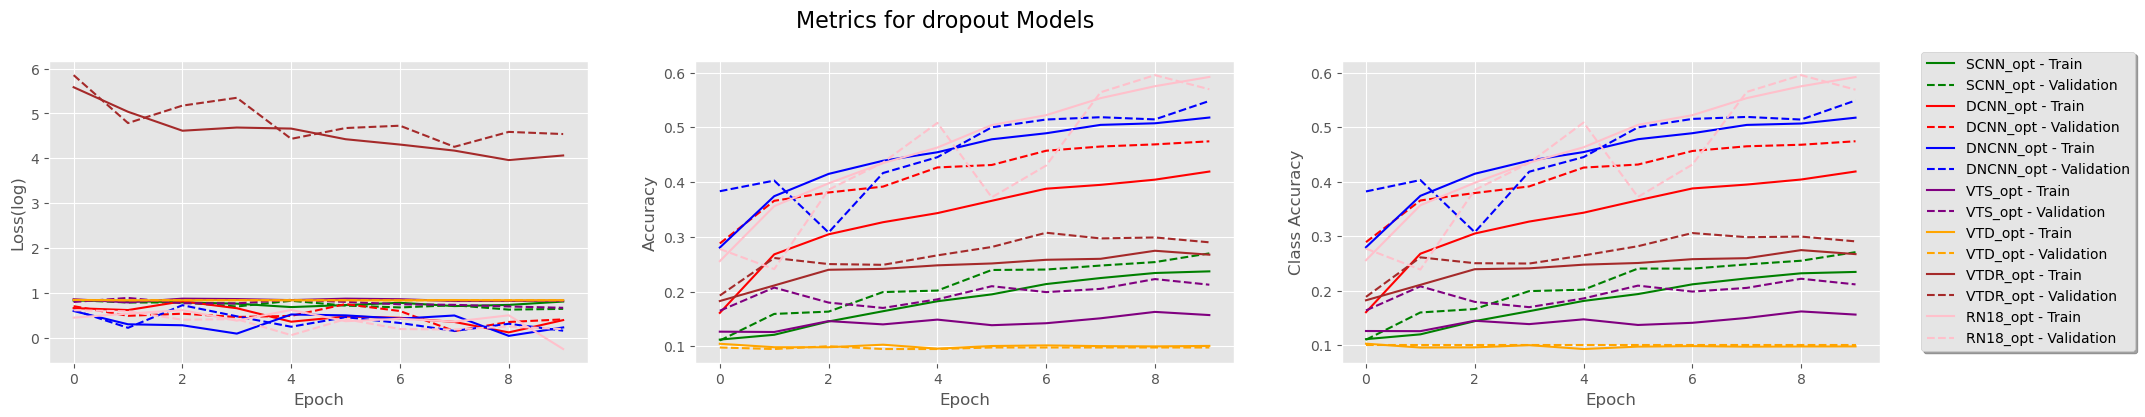

In [8]:
plot_evaluation(df_dropout, "dropout")

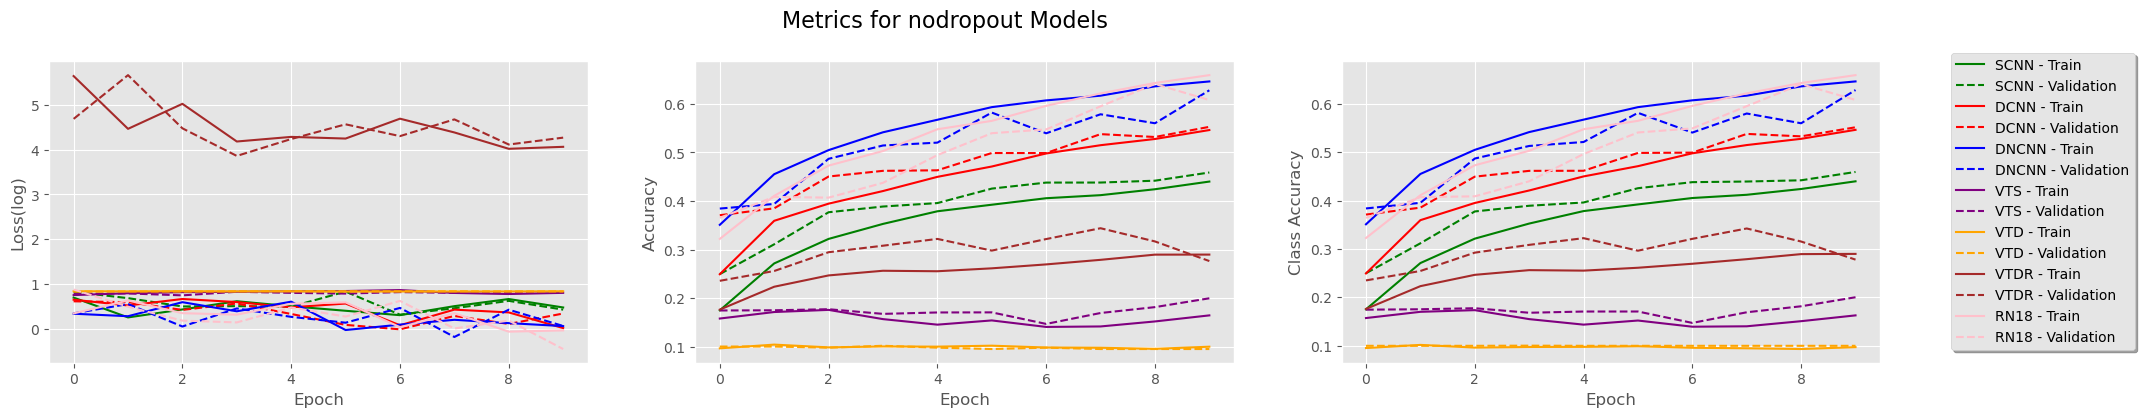

In [9]:
plot_evaluation(df_no_dropout, "nodropout")

In [10]:
# get mean of val/mAcc, val/mClassAcc
df_dropout['val/mAcc'] = df_dropout['val/mAcc'].apply(lambda x: ast.literal_eval(x))
df_dropout['val/mClassAcc'] = df_dropout['val/mClassAcc'].apply(lambda x: ast.literal_eval(x))
df_dropout['val/mAcc'] = df_dropout['val/mAcc'].apply(lambda x: sum(x)/len(x))
df_dropout['val/mClassAcc'] = df_dropout['val/mClassAcc'].apply(lambda x: sum(x)/len(x))

print("\\begin{table}[h]")
print("\\caption{Model benchmarks with dropout}")
print("\\label{tab:dropout_models}")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c|c|c|c| }")
print("\\hline")
print("\\textbf{Model} & \\textbf{val. ACC} & \\textbf{val PACC} & \\textbf{test ACC} & \\textbf{test PACC} \\\\")
print("\\hline")
for index, row in df_dropout.iterrows():
    print(f"{row['model']} & {row['val/mAcc']:.4f} & {row['val/mClassAcc']:.4f} & {row['test/mAcc']:.4f} & {row['test/mClassAcc']:.4f} \\\\")
print("\\hline")
print("\\end{tabular}")
print("\\end{center}")
print("\\end{table}")


\begin{table}[h]
\caption{Model benchmarks with dropout}
\label{tab:dropout_models}
\begin{center}
\begin{tabular}{ |c|c|c|c|c| }
\hline
\textbf{Model} & \textbf{val. ACC} & \textbf{val PACC} & \textbf{test ACC} & \textbf{test PACC} \\
\hline
SCNN_opt & 0.2086 & 0.2095 & 0.2665 & 0.2665 \\
DCNN_opt & 0.4150 & 0.4146 & 0.4809 & 0.4809 \\
DNCNN_opt & 0.4551 & 0.4553 & 0.5437 & 0.5437 \\
VTS_opt & 0.1958 & 0.1956 & 0.2164 & 0.2164 \\
VTD_opt & 0.0974 & 0.1000 & 0.1000 & 0.1000 \\
VTDR_opt & 0.2695 & 0.2692 & 0.2914 & 0.2914 \\
RN18_opt & 0.4380 & 0.4376 & 0.5712 & 0.5712 \\
\hline
\end{tabular}
\end{center}
\end{table}


In [11]:
# get mean of val/mAcc, val/mClassAcc
df_no_dropout['val/mAcc'] = df_no_dropout['val/mAcc'].apply(lambda x: ast.literal_eval(x))
df_no_dropout['val/mClassAcc'] = df_no_dropout['val/mClassAcc'].apply(lambda x: ast.literal_eval(x))
df_no_dropout['val/mAcc'] = df_no_dropout['val/mAcc'].apply(lambda x: sum(x)/len(x))
df_no_dropout['val/mClassAcc'] = df_no_dropout['val/mClassAcc'].apply(lambda x: sum(x)/len(x))

print("\\begin{table}[h]")
print("\\caption{Model benchmarks with no dropout}")
print("\\label{tab:no_dropout_models}")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c|c|c|c| }")
print("\\hline")
print("\\textbf{Model} & \\textbf{val. ACC} & \\textbf{val PACC} & \\textbf{test ACC} & \\textbf{test PACC} \\\\")
print("\\hline")
for index, row in df_no_dropout.iterrows():
    print(f"{row['model']} & {row['val/mAcc']:.4f} & {row['val/mClassAcc']:.4f} & {row['test/mAcc']:.4f} & {row['test/mClassAcc']:.4f} \\\\")
print("\\hline")
print("\\end{tabular}")
print("\\end{center}")
print("\\end{table}")


\begin{table}[h]
\caption{Model benchmarks with no dropout}
\label{tab:no_dropout_models}
\begin{center}
\begin{tabular}{ |c|c|c|c|c| }
\hline
\textbf{Model} & \textbf{val. ACC} & \textbf{val PACC} & \textbf{test ACC} & \textbf{test PACC} \\
\hline
SCNN & 0.3924 & 0.3929 & 0.4512 & 0.4512 \\
DCNN & 0.4752 & 0.4749 & 0.5544 & 0.5544 \\
DNCNN & 0.5189 & 0.5190 & 0.6305 & 0.6305 \\
VTS & 0.1733 & 0.1736 & 0.2002 & 0.2002 \\
VTD & 0.0977 & 0.1000 & 0.1000 & 0.1000 \\
VTDR & 0.2973 & 0.2966 & 0.2770 & 0.2770 \\
RN18 & 0.5044 & 0.5050 & 0.6101 & 0.6101 \\
\hline
\end{tabular}
\end{center}
\end{table}
